# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
env = UnityEnvironment(file_name="/home/ssl/NanoDegree/deep-reinforcement-learning/p1_navigation/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from DQN_agent import Agent
from collections import deque
import torch

agent = Agent(state_size, action_size, 0)
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
eps = 1.0
num_episode = 2000
scores = []
scores_window = deque(maxlen=100)

Run the following cell to train the robot

Episode: 0	Score: -1.0	epsilon: 0.99	Avg. score: -1.0
Episode: 1	Score: 1.0	epsilon: 0.9801	Avg. score: 0.0
Episode: 2	Score: 0.0	epsilon: 0.9702989999999999	Avg. score: 0.0
Episode: 3	Score: 0.0	epsilon: 0.96059601	Avg. score: 0.0
Episode: 4	Score: 0.0	epsilon: 0.9509900498999999	Avg. score: 0.0
Episode: 5	Score: 1.0	epsilon: 0.9414801494009999	Avg. score: 0.16666666666666666
Episode: 6	Score: 0.0	epsilon: 0.9320653479069899	Avg. score: 0.14285714285714285
Episode: 7	Score: 1.0	epsilon: 0.92274469442792	Avg. score: 0.25
Episode: 8	Score: 0.0	epsilon: 0.9135172474836407	Avg. score: 0.2222222222222222
Episode: 9	Score: -3.0	epsilon: 0.9043820750088043	Avg. score: -0.1
Episode: 10	Score: 2.0	epsilon: 0.8953382542587163	Avg. score: 0.09090909090909091
Episode: 11	Score: 0.0	epsilon: 0.8863848717161291	Avg. score: 0.08333333333333333
Episode: 12	Score: 1.0	epsilon: 0.8775210229989678	Avg. score: 0.15384615384615385
Episode: 13	Score: 1.0	epsilon: 0.8687458127689781	Avg. score: 0.2142857142

Episode: 105	Score: 4.0	epsilon: 0.34461218334751764	Avg. score: 0.96
Episode: 106	Score: 4.0	epsilon: 0.34116606151404244	Avg. score: 1.0
Episode: 107	Score: 6.0	epsilon: 0.337754400898902	Avg. score: 1.05
Episode: 108	Score: 3.0	epsilon: 0.334376856889913	Avg. score: 1.08
Episode: 109	Score: 1.0	epsilon: 0.33103308832101386	Avg. score: 1.12
Episode: 110	Score: 5.0	epsilon: 0.3277227574378037	Avg. score: 1.15
Episode: 111	Score: 2.0	epsilon: 0.3244455298634257	Avg. score: 1.17
Episode: 112	Score: 5.0	epsilon: 0.3212010745647914	Avg. score: 1.21
Episode: 113	Score: 1.0	epsilon: 0.3179890638191435	Avg. score: 1.21
Episode: 114	Score: 8.0	epsilon: 0.31480917318095203	Avg. score: 1.28
Episode: 115	Score: 5.0	epsilon: 0.3116610814491425	Avg. score: 1.34
Episode: 116	Score: 2.0	epsilon: 0.30854447063465107	Avg. score: 1.36
Episode: 117	Score: 2.0	epsilon: 0.30545902592830454	Avg. score: 1.38
Episode: 118	Score: 0.0	epsilon: 0.3024044356690215	Avg. score: 1.37
Episode: 119	Score: 2.0	epsilon

Episode: 223	Score: 4.0	epsilon: 0.10526490184835911	Avg. score: 5.96
Episode: 224	Score: 6.0	epsilon: 0.10421225282987552	Avg. score: 6.02
Episode: 225	Score: 10.0	epsilon: 0.10317013030157676	Avg. score: 6.08
Episode: 226	Score: 12.0	epsilon: 0.10213842899856099	Avg. score: 6.18
Episode: 227	Score: 7.0	epsilon: 0.10111704470857538	Avg. score: 6.22
Episode: 228	Score: 11.0	epsilon: 0.10010587426148963	Avg. score: 6.29
Episode: 229	Score: 11.0	epsilon: 0.09910481551887473	Avg. score: 6.38
Episode: 230	Score: 9.0	epsilon: 0.1	Avg. score: 6.43
Episode: 231	Score: 8.0	epsilon: 0.1	Avg. score: 6.51
Episode: 232	Score: 15.0	epsilon: 0.1	Avg. score: 6.57
Episode: 233	Score: 7.0	epsilon: 0.1	Avg. score: 6.54
Episode: 234	Score: 4.0	epsilon: 0.1	Avg. score: 6.58
Episode: 235	Score: 11.0	epsilon: 0.1	Avg. score: 6.62
Episode: 236	Score: 15.0	epsilon: 0.1	Avg. score: 6.76
Episode: 237	Score: 12.0	epsilon: 0.1	Avg. score: 6.84
Episode: 238	Score: 12.0	epsilon: 0.1	Avg. score: 6.87
Episode: 239	Sc

Episode: 371	Score: 14.0	epsilon: 0.1	Avg. score: 11.26
Episode: 372	Score: 12.0	epsilon: 0.1	Avg. score: 11.35
Episode: 373	Score: 15.0	epsilon: 0.1	Avg. score: 11.4
Episode: 374	Score: 14.0	epsilon: 0.1	Avg. score: 11.44
Episode: 375	Score: 12.0	epsilon: 0.1	Avg. score: 11.49
Episode: 376	Score: 9.0	epsilon: 0.1	Avg. score: 11.5
Episode: 377	Score: 17.0	epsilon: 0.1	Avg. score: 11.59
Episode: 378	Score: 10.0	epsilon: 0.1	Avg. score: 11.55
Episode: 379	Score: 11.0	epsilon: 0.1	Avg. score: 11.6
Episode: 380	Score: 12.0	epsilon: 0.1	Avg. score: 11.66
Episode: 381	Score: 12.0	epsilon: 0.1	Avg. score: 11.74
Episode: 382	Score: 14.0	epsilon: 0.1	Avg. score: 11.77
Episode: 383	Score: 7.0	epsilon: 0.1	Avg. score: 11.77
Episode: 384	Score: 14.0	epsilon: 0.1	Avg. score: 11.83
Episode: 385	Score: 18.0	epsilon: 0.1	Avg. score: 11.85
Episode: 386	Score: 12.0	epsilon: 0.1	Avg. score: 11.86
Episode: 387	Score: 15.0	epsilon: 0.1	Avg. score: 11.92
Episode: 388	Score: 12.0	epsilon: 0.1	Avg. score: 11.

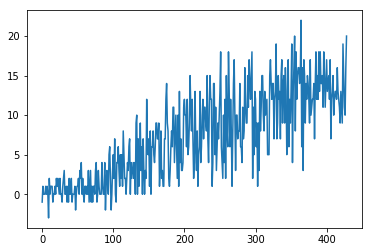

In [8]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
for i in range(num_episode):
    env_info = env.reset(train_mode=True)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0
    while True:
        action = agent.act(state, eps)        # select an action
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        agent.step(state, action, reward, next_state, done)
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        
        if done:                                       # exit loop if episode finished
            break
    scores.append(score)
    scores_window.append(score)
    
    if np.mean(scores_window)>=13.0:
        print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i, np.mean(scores_window)))
        torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
        break
            
    eps = eps*0.99 if eps > 0.1 else 0.1
    
    print("Episode: {}\tScore: {}\tepsilon: {}\tAvg. score: {}".format(i, score, eps, np.mean(scores_window)))
    
plt.plot(scores)
plt.show()    

## Network is trained
See how the trained agent plays

In [9]:
# load the weights from file
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth'))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 14.0


In [10]:
env.close()